This is basically the same exact code as in `string_MSM_analysis_TICs_deep_time-dev` except it's not a mess like I made it, just the plotting and nothing else

In [1]:
import os
import pickle
import sys
import logging
import numpy as np
import matplotlib.pyplot as plt


logging.getLogger("stringmethod").setLevel(logging.ERROR)
sys.path.append("../../string-method-gmxapi/")
import string_tica_msm as my_msm

2022-03-29 15:09:10 root-INFO: Setting up logging for gmxapi package.
2022-03-29 15:09:10 gmxapi-INFO: Importing gmxapi.
2022-03-29 15:09:10 gmxapi.operation-INFO: Importing gmxapi.operation
2022-03-29 15:09:10 gmxapi.commandline-INFO: Importing gmxapi.commandline
2022-03-29 15:09:10 gmxapi.simulation.workflow-INFO: Importing gmx.workflow
2022-03-29 15:09:10 gmxapi.simulation.workflow-INFO: Using schema version gmxapi_workspec_0_1.
2022-03-29 15:09:10 gmxapi.mdrun-INFO: Importing gmxapi.simulation.mdrun
2022-03-29 15:09:10 gmxapi.read_tpr-INFO: Importing gmxapi.simulation.read_tpr
2022-03-29 15:09:10 gmxapi.modify_input-INFO: Importing gmxapi.simulation.modify_input
2022-03-29 15:09:10 stringmethod-0-INFO: Using 1 MPI ranks 


Fructose

In [2]:
name_sim = "influx_BFRU_gate_CV"
simulation_directory = f"/data2/GLUT5_string/string/string_sims/TMD_initial_path/{name_sim}"
path_report = f"/data2/GLUT5_string/string/analysis/images_figs/MSM_FES/IC_EC_MSM/{name_sim}"
os.chdir(simulation_directory)
os.getcwd()

'/data2/GLUT5_string/string/string_sims/TMD_initial_path/influx_BFRU_gate_CV'

In [3]:
cv_labels = ["Intracellular gate (nm)", "Extracellular gate (nm)"]

xlim = (0.9,1.6)
ylim = (0.8,1.6)

In [4]:
def get_G5_atomistic_gate(timestep):
    # get all pieces together, then colors and naming consistent in plots
    G5_Out = np.array(['OUT', 'Out Open', 'green', "Greens"])
    G5_OutOcc = np.array(['OUT-OCC', 'Out Occ.', 'grey', "Greys"])
    G5_Occ = np.array(['OCC', 'Occluded', 'red', "Reds"])
    G5_InOcc = np.array(['IN-OCC', 'In Occ.', 'orange', "Oranges"])
    G5_In = np.array(['IN', 'In Open', 'blue', "Blues"])
    #all_sims = np.array([G5_Out, G5_OutOcc, G5_Occ, G5_InOcc, G5_In])
    all_sims = np.array([G5_Out, G5_Occ, G5_In])
    indir = '/data2/GLUT5_string/string/analysis/textfiles_out/EC_IC_gate_refs'

 
    out_arr = []
    for n, sim in enumerate(all_sims):
        name = sim[0]
        ec = np.loadtxt(f"{indir}/{name}.EC.{timestep}.xvg")[1]
        ic = np.loadtxt(f"{indir}/{name}.IC.{timestep}.xvg")[1]
        
        
        temp = np.append(all_sims[n], [f'EC: {str(ec)}', f'IC: {str(ic)}'])
        out_arr.append(temp)

    out_arr = np.array(out_arr)
    return out_arr

In [5]:
plot_atomistic = True
name = 'start_model'
#name = 'end_atom'
atom_sims = get_G5_atomistic_gate(name)

In [6]:
name_sim = 'influx_apo_gate_CV'
path_to_sim = f"/data2/GLUT5_string/string/string_sims/TMD_initial_path/{name_sim}"
path_report = f"/data2/GLUT5_string/string/analysis/images_figs/MSM_FES/IC_EC_MSM/{name_sim}"

2022-03-29 15:09:19 matplotlib.colorbar-DEBUG: locator: <matplotlib.colorbar._ColorbarAutoLocator object at 0x7f1fa854ea90>
2022-03-29 15:09:19 matplotlib.colorbar-DEBUG: Using auto colorbar locator <matplotlib.colorbar._ColorbarAutoLocator object at 0x7f1fa854ea90> on colorbar
2022-03-29 15:09:19 matplotlib.colorbar-DEBUG: Setting pcolormesh


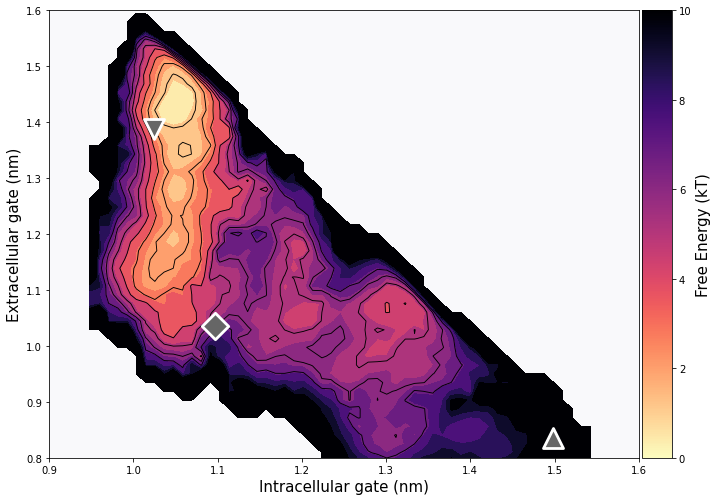

In [8]:
F = np.load(f'{path_to_sim}/F_MSM.npy')
extent = np.load(f'{path_to_sim}/extent_MSM.npy')
cv_proj = np.load(f'{path_to_sim}/cv_proj_MSM.npy')
last_iteration = None
first_iteration = 100


f_max = 10
#cm = plt.cm.get_cmap('gist_yarg')
cm = plt.cm.get_cmap('magma_r')

if last_iteration == None:
    last_iteration_n = "final"
else:
    last_iteration_n = last_iteration
    
with plt.rc_context({"axes.grid": False}):

    fig, ax = my_msm.plot_2D_heatmap(
        F,
        extent,
        cmap=cm,
        f_max=f_max,
        cbar_label="Free Energy (kT)",
        xlabel=cv_labels[0],
        ylabel=cv_labels[1],
        xlim= xlim,
        ylim= ylim
    )

    fig.tight_layout()
    plt.rcParams["axes.grid"] = False

    ax.contour(F, vmin=0, vmax=f_max, extent=extent, colors = 'black', \
               levels = [0,1,2,3,4,5,6,7], linewidths=0.9)

    ax.xaxis.label.set_size(15)
    ax.yaxis.label.set_size(15)

    markers = ['v','D','^']
    sizes = [400, 350, 400]
    if plot_atomistic:
        for n, sim in enumerate(atom_sims):
            ic = float(sim[-1].split(' ')[1])
            ec = float(sim[-2].split(' ')[1])
            ax.scatter(ic, ec, color = ['#666666'], edgecolor = 'white', \
                       s = sizes[n], zorder=2, marker = markers[n], linewidth = 2.8)

       # fig.savefig(path_report + f"/structure_snapshots/FES_cutoff{f_max}.{name}.iteration{first_iteration}-{last_iteration_n}.png", \
        #           dpi = 1000)
#

